In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import torch
import sys
from matplotlib import pylab as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'
from WaveRNN.utils.display import plot_spec
from WaveRNN.utils.audio import AudioProcessor

In [3]:
from WaveRNN.models.wavernn import Model
bits = 9
model = Model(rnn_dims=512, 
                fc_dims=512, 
                bits=9,
                pad=2,
                upsample_factors=(5, 5, 11), 
                feat_dims=80,
                compute_dims=128, 
                res_out_dims=128, 
                res_blocks=10,
                hop_length=275,
                sample_rate=22050).cuda()

### Test model

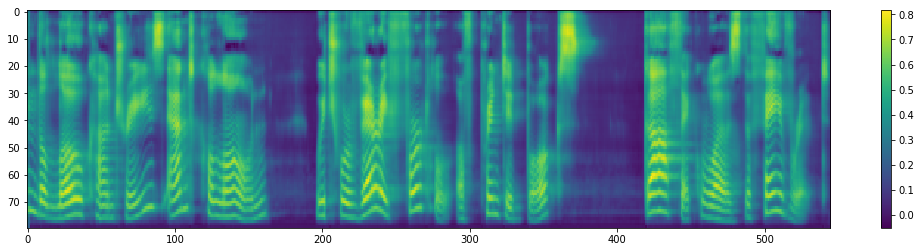

In [4]:
mel = np.load("/home/erogol/Data/LJSpeech-1.1/wavernn_val/mel/LJ001-0067.npy")
# mel = np.load("/home/erogol/Data/LJSpeech-1.1/wavernn_val/mel/LJ001-0025.npy")
plot_spec(mel.squeeze())


In [5]:
check = torch.load("/home/erogol/checkpoint_332000.pth.tar")
model.load_state_dict(check['model'])
model.cuda()
model.eval();

In [ ]:
wav = model.generate(torch.FloatTensor(mel).unsqueeze(0).cuda(), batched=False, target=11000, overlap=550)
# wav = model.module.generate(torch.FloatTensor(mel[:,:50]).unsqueeze(0).cuda(), verbose=True, deterministic=False)
# wav_hat = AudioProcessor.mulaw_decode(wav, 2 ** 9)

115400/149875 -- batch_size: 1 -- gen_rate: 1.7 kHz -- x_realtime: 0.1  

In [ ]:
wav.max()

In [ ]:
from IPython import display
display.Audio(wav, rate=22050)

In [ ]:
plt.plot(wav.squeeze())

In [ ]:
plt.figure(figsize=(10,100))
plt.imshow(model.module.I.weight.data.cpu().numpy()[:, 0:])
plt.colorbar()

### Use GroundTruth spectrogram

In [ ]:
import librosa
file_name = "/home/erogol/Data/LJSpeech-1.1/wavs/LJ001-0067.wav"

In [ ]:
from TTS.utils.generic_utils import load_config

# Set constants
ROOT_PATH = '/media/erogol/data_ssd/Data/models/ljspeech_models/4241/'
CONFIG_PATH = ROOT_PATH + '/config.json'
CONFIG = load_config(CONFIG_PATH)

ap = AudioProcessor(**CONFIG.audio)         

In [ ]:
wav_gt = ap.load_wav(file_name)
mel_gt = ap.melspectrogram(wav_gt)
wav = model.generate(torch.FloatTensor(mel).unsqueeze(0).cuda(), batched=False, target=11000, overlap=550)

In [ ]:
plt.plot(wav.squeeze())

In [ ]:
plt.plot(wav_gt.squeeze())

In [ ]:
display.Audio(wav_gt, rate=22050)

In [ ]:
display.Audio(wav, rate=22050)